In [3]:
import pandas as pd 
import numpy as np
# read excel, skip first two rows and name sheet is NPX data
df = pd.read_excel('/home/ubuntu/tenerife/data/LungAmbition/Proteinas/20201979 Resultados proteínas OLINK INTEGRAL NAVARRA NPX.xlsx', skiprows=2, sheet_name='NPX Data')
df.head(4)

,Panel,Olink Target 96 Cardiometabolic(v.3603),Olink Target 96 Cardiometabolic(v.3603).1,Olink Target 96 Cardiometabolic(v.3603).2,Olink Target 96 Cardiometabolic(v.3603).3,Olink Target 96 Cardiometabolic(v.3603).4,Olink Target 96 Cardiometabolic(v.3603).5,Olink Target 96 Cardiometabolic(v.3603).6,Olink Target 96 Cardiometabolic(v.3603).7,Olink Target 96 Cardiometabolic(v.3603).8,...,Olink Target 96 Cardiovascular III(v.6114).93,Olink Target 96 Development(v.3521).93,Olink Target 96 Immune Response(v.3204).93,Olink Target 96 Inflammation(v.3022).93,Olink Target 96 Metabolism(v.3403).93,Olink Target 96 Neuro Exploratory(v.3911).93,Olink Target 96 Neurology(v.8013).93,Olink Target 96 Oncology II(v.7005).93,Olink Target 96 Oncology III(v.4002).93,Olink Target 96 Organ Damage(v.3311).93
0,Assay,PRCP,CA1,ICAM1,CHL1,TGFBI,ENG,PLTP,SERPINA7,IGFBP3,...,QC Warning,QC Warning,QC Warning,QC Warning,QC Warning,QC Warning,QC Warning,QC Warning,QC Warning,QC Warning
1,Uniprot ID,P42785,P00915,P05362,O00533,Q15582,P17813,P55058,P05543,P17936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,OlinkID,OID01272,OID01223,OID01230,OID01216,OID01291,OID01254,OID01275,OID01232,OID01255,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# keep rows 1 and 2 and save them in transposed form
df1 = df.iloc[0:2].T
# rename columns to the name of the first row
df1.columns = df1.iloc[0]
# drop first row
df1 = df1.drop(df1.index[0])
print(df1.head(4))
# sum nan in df1['Uniprot ID']
df1['Uniprot ID'].isna().sum()

Panel                                      Assay Uniprot ID
Olink Target 96 Cardiometabolic(v.3603)     PRCP     P42785
Olink Target 96 Cardiometabolic(v.3603).1    CA1     P00915
Olink Target 96 Cardiometabolic(v.3603).2  ICAM1     P05362
Olink Target 96 Cardiometabolic(v.3603).3   CHL1     O00533


26

In [8]:
df1['Assay'].isna().sum()

0

In [9]:
# save df1 to csv
df1.to_csv('/home/ubuntu/tenerife/data/LungAmbition/Proteinas/OlinkCode_UniprotID.csv')

In [30]:
df_merged = pd.read_csv('/home/ubuntu/tenerife/data/LungAmbition/Excels_merged/LungAmbitionMergedAllGroupUpdated3mar2025.csv')
df_merged = df_merged[df_merged['GroupUpdated'].isin(['Lung_Cancer', 'Benign_Nodules', 'False_Positive'])]
columns_to_drop = ['ID_imagingData','Cancer_Status','TimeYears_blood','TimeMonths_blood',
                            'TimeYears_CT_blood','TimeMonths_CT_blood','Diff_Diag_Blood_TimeYears','LastFollow_upTimeYears',
                            'Age','Sex','Body_mass_index','Smoking_status','Years_smoked','Smoking_pack_years',
                            'Family_history_lung_cancer','Personal_history_cancer','Stage_category','NRRD_File','SEG_Files', 'GroupUpdated']

df_merged = df_merged.drop(columns=columns_to_drop)
# df_merged = df_merged.rename(columns
                            #  =dict(zip(df1['Assay'], df1['Uniprot ID'])))

In [31]:
# rename columns in df_merged except ID_ProteinData and Group using the 
# column Assay in df1 as reference to then rename to column Uniprot ID
# if a column cannot be renamed print the name
for column in df_merged.columns:
    if column == 'ID_proteinData' or column == 'Group':
        continue
    if column in df1['Assay'].values:
        df_merged = df_merged.rename(columns
                            =dict(zip(df1['Assay'], df1['Uniprot ID'])))
    else:
        print(column)
        # drop column from df_merged
        df_merged = df_merged.drop(columns=column)


PDGF_subunit_B
IgG_Fc_receptor_II-b
HSP_27
LDL_receptor
BLM_hydrolase
Notch_3
PDGF_subunit_A
IL6.1
OPG.1
LAP_TGF-beta-1
uPA.1
IL6.2
MCP-1.1
CXCL1.1
SCF.1
IL18.1
CCL11.1
FGF-23.1
FGF-21.1
IL-22_RA1
IL10.1
CCL3.1
IL5.1
NT-proBNP.1
GDNF.1
ADAM_22
ADAM_23
THY_1
VEGFA.1
IL6.3
TRAIL.1
SCF.2
TGF-alpha.1
MetAP_2
GPNMB.1
HGF.1
ADAM_8
AREG.1
MAD_homolog_5
ADAM-TS_15


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from sklearn.model_selection import StratifiedKFold, train_test_split
# add path to binn in sys /home/ubuntu/tenerife/data/ZZ_githubRepos/BINN
sys.path.append('/home/ubuntu/tenerife/data/ZZ_githubRepos/BINN')
from binn import BINN, BINNDataLoader, BINNTrainer, BINNExplainer
from binn.plot.network import visualize_binn
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import torch

np.set_printoptions(precision=3)
path_to_save_results = '/home/ubuntu/tenerife/data/LungAmbition/Proteinas/ResultsBaselines_BMY0/BINN'
path_to_save_plots = os.path.join(path_to_save_results, 'Plots')
n_folds=3
path_to_folds_csv = f'/home/ubuntu/tenerife/data/ZZ_githubRepos/LungAmbition/Data_stratified_split/folds-def_{n_folds}folds'
keep_false_positives_as_separate_test = True
# create path_to_save_plots if it does not exist
if not os.path.exists(path_to_save_plots):
    os.makedirs(path_to_save_plots)
name_file= f"BINN_proteins_11march25_{n_folds}folds"
if keep_false_positives_as_separate_test:
    name_file= name_file + "_keep_FP_separated_test"

df_merged = pd.read_csv('/home/ubuntu/tenerife/data/LungAmbition/Excels_merged/LungAmbitionMergedAllGroupUpdated3mar2025.csv')
# filter df_merged by GroupUpdated to keep only Lung_Cancer, Benign_Nodules and False_Positive
df_merged = df_merged[df_merged['GroupUpdated'].isin(['Lung_Cancer', 'Benign_Nodules', 'False_Positive'])]
columns_to_drop = ['ID_imagingData','Cancer_Status','TimeYears_blood','TimeMonths_blood',
                            'TimeYears_CT_blood','TimeMonths_CT_blood','Diff_Diag_Blood_TimeYears','LastFollow_upTimeYears',
                            'Age','Sex','Body_mass_index','Smoking_status','Years_smoked','Smoking_pack_years',
                            'Family_history_lung_cancer','Personal_history_cancer','Stage_category','NRRD_File','SEG_Files', 'GroupUpdated']

df_merged = df_merged.drop(columns=columns_to_drop)
df1=pd.read_csv('/home/ubuntu/tenerife/data/LungAmbition/Proteinas/OlinkCode_UniprotID.csv')
for column in df_merged.columns:
    if column == 'ID_proteinData' or column == 'Group':
        continue
    if column in df1['Assay'].values:
        df_merged = df_merged.rename(columns
                            =dict(zip(df1['Assay'], df1['Uniprot ID'])))
    else:
        print(column)
        # drop column from df_merged
        df_merged = df_merged.drop(columns=column)
if keep_false_positives_as_separate_test:
    y_false_positives = df_merged[df_merged['Group'] == 'False_Positive']['Group']
    # convert label to 1
    y_false_positives = y_false_positives.replace({'False_Positive': 0})
    ID_false_positives = df_merged[df_merged['Group'] == 'False_Positive']['ID_proteinData']
    # create list to store wrong predicted false positives
    list_ID_wrong_predicted_false_positives = []
    X_false_positives = df_merged[df_merged['Group'] == 'False_Positive'].drop(columns=['ID_proteinData', 'Group'])
    test_false_positives=df_merged[df_merged['Group'] == 'False_Positive']
    # drop in df_cur rows where Group is False_Positive
    df_merged = df_merged[df_merged['Group'].isin(['Lung_Cancer', 'Benign_Nodules'])]
    print("Number of false positives:", X_false_positives.shape[0])
    # save false_positive_metrics in df
    false_positive_metrics = pd.DataFrame(columns=['AUC', 'Balanced_accuracy', 'Accuracy', 'Precision', 'Recall', 'F1-score'])
else:
    df_merged = df_merged[df_merged['Group'].isin(['Lung_Cancer', 'Benign_Nodules', 'False_Positive'])]
    # print shape of excel
    print("Dimensions excel after dropping rows where Group is False_Positive:", df_merged.shape)
# get column to predict Group
y_target = df_merged['Group']
# encode y
y_target = y_target.replace({'Lung_Cancer': 1, 'Benign_Nodules': 0, 'False_Positive': 0})

# save best metrics for each fold
fold_metrics_df = pd.DataFrame(columns=['Fold', 'Accuracy', 'Specificity', 'NPV', 'Precision', 'Recall', 'F1-score'])
# save top features for each fold
top_features_df_list = []

for fold in range(0, n_folds):
    if fold > 0:
        break
    print("=" * 80)
    print(f"Fold {fold + 1}:")
    # read train, test and val indices for each fold
    fold_data = pd.read_csv(os.path.join(path_to_folds_csv, f'id2splitfold_{fold}.csv'))
    # get corresponding ID_proteinData for split (train, test, val) in fold_data and read then in df_cur, 
    # loc the rows in df_merged with ID_proteinData in df_cur
    train_index = fold_data[fold_data['split'] == 'train']['ID_proteinData']
    test_index = fold_data[fold_data['split'] == 'test']['ID_proteinData']
    val_index = fold_data[fold_data['split'] == 'val']['ID_proteinData']
    # get first train, text, val, then split into X_train, X_test, X_val and y_train, y_test, y_val
    train = df_merged.loc[df_merged['ID_proteinData'].isin(train_index)]
    test = df_merged.loc[df_merged['ID_proteinData'].isin(test_index)]
    val = df_merged.loc[df_merged['ID_proteinData'].isin(val_index)]
    # join train and val together in train_val
    train_val = pd.concat([train, val], axis=0)
    X_train = train.drop(columns=['ID_proteinData', 'Group'])
    y_train = y_target.loc[y_target.index.isin(X_train.index)]
    X_test = test.drop(columns=['ID_proteinData', 'Group'])
    y_test = y_target.loc[y_target.index.isin(X_test.index)]
    X_val = val.drop(columns=['ID_proteinData', 'Group'])
    y_val = y_target.loc[y_target.index.isin(X_val.index)]
    
    print("Training data:", X_train.shape, y_train.shape, "Benign patients train:", len(y_train[y_train == 0]), "Lung cancer patients train:", len(y_train[y_train == 1]))
    print("Validation data:", X_val.shape, y_val.shape, "Benign patients val:", len(y_val[y_val == 0]), "Lung cancer patients val:", len(y_val[y_val == 1]))
    print("Test data:", X_test.shape, y_test.shape, "Benign patients test:", len(y_test[y_test == 0]), "Lung cancer patients test:", len(y_test[y_test == 1]))
    print("Number of samples per class in y_train")
    print(y_train.value_counts())
    print("Number of samples per class in y_test")
    print(y_test.value_counts())
    print("Number of samples per class in y_val")
    print(y_val.value_counts())
    # join X_val in X_train and y_val in y_train
    X_train = pd.concat([X_train, X_val], axis=0)
    y_train = np.concatenate((y_train, y_val), axis=0)
    print("Training data after joining with validation data:", X_train.shape, y_train.shape, "Benign patients train:", len(y_train[y_train == 0]), "Lung cancer patients train:", len(y_train[y_train == 1]))
    # convert to str the columns of X_train, X_test
    X_train.columns = X_train.columns.astype(str)
    X_test.columns = X_test.columns.astype(str)
    # scale the data using StandardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    # Create the data matrix with Protein column (Transposed for BINN compatibility)
    train_data_matrix = pd.DataFrame(X_train, columns=train_val.drop(columns=['ID_proteinData', 'Group']).columns, index=train_val['ID_proteinData'])
    train_data_matrix = train_data_matrix.T
    train_data_matrix.insert(0, 'Protein', train_data_matrix.index)
    train_data_matrix.reset_index(drop=True, inplace=True)
    print("Data Matrix Columns:", train_data_matrix.columns)
    print("Data Matrix Shape:", train_data_matrix.shape)
    print("Data Matrix Sample:", train_data_matrix.head())
    # test data matrix
    test_data_matrix = pd.DataFrame(X_test, columns=test.drop(columns=['ID_proteinData', 'Group']).columns, index=test['ID_proteinData'])
    test_data_matrix = test_data_matrix.T
    test_data_matrix.insert(0, 'Protein', test_data_matrix.index)
    test_data_matrix.reset_index(drop=True, inplace=True)
    print("Test Data Matrix Columns:", test_data_matrix.columns)
    print("Test Data Matrix Shape:", test_data_matrix.shape)
    
    # Create the design matrix
    train_design_matrix = pd.DataFrame({'sample': train_val['ID_proteinData'].values, 'group': y_train})
    print("Design matrix head:", train_design_matrix.head())
    print("Design matrix shape:", train_design_matrix.shape)
    test_design_matrix = pd.DataFrame({'sample': test['ID_proteinData'].values, 'group': y_test})
    print("Test Design matrix head:", test_design_matrix.head())
    print("Test Design matrix shape:", test_design_matrix.shape)
    
    # Initialize BINN
    binn = BINN(data_matrix=train_data_matrix, network_source="reactome", n_layers=10, dropout=0.3)
    print(binn)

    ## Initialize DataLoader
    binn_dataloader = BINNDataLoader(binn)

    # Create DataLoaders
    trainval_dataloaders = binn_dataloader.create_dataloaders(
        data_matrix=train_data_matrix,
        design_matrix=train_design_matrix,
        feature_column="Protein",
        group_column="group",
        sample_column="sample",
        batch_size=64,
        validation_split=0.3,
    )
    test_dataloaders = binn_dataloader.create_dataloaders(
        data_matrix=test_data_matrix,
        design_matrix=test_design_matrix,
        feature_column="Protein",
        group_column="group",
        sample_column="sample",
        batch_size=64,
        validation_split=0,
    )
    # Train the model only on training data
    trainer = BINNTrainer(binn)
    trainer.fit(trainval_dataloaders, num_epochs=10)
    train_dataloaders = binn_dataloader.create_dataloaders(
        data_matrix=train_data_matrix,
        design_matrix=train_design_matrix,
        feature_column="Protein",
        group_column="group",
        sample_column="sample",
        batch_size=64,
        validation_split=0,
    )
    # Predict on all training data
    y_train_pred_logits = trainer.predict(train_dataloaders["train"])
    print("Logits predicted on training data", y_train_pred_logits)
    y_train_pred_prob = torch.softmax(torch.tensor(y_train_pred_logits), dim=1).numpy()
    print("Probabilities training data:", y_train_pred_prob)
    y_train_pred = np.argmax(y_train_pred_prob, axis=1)
    print("Predictions training data:", y_train_pred)
    # calculate metrics   
    auc_train = roc_auc_score(y_train, y_train_pred_prob[:, 1])
    balanced_accuracy_train = balanced_accuracy_score(y_train, y_train_pred)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred, average='weighted')
    recall_train = recall_score(y_train, y_train_pred, average='weighted')
    f1_train = f1_score(y_train, y_train_pred, average='weighted')
    tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred, labels=[0, 1]).ravel()
    NPV_train=tn/(tn+fn)
    specificity_train=tn/(tn+fp)
    print(f"Metrics in train for fold: {fold+1}")
    print(f"AUC: {auc_train}")
    print(f"Balanced accuracy: {balanced_accuracy_train}")
    print(f"Accuracy: {accuracy_train}")
    print(f"Precision: {precision_train}")
    print(f"Recall: {recall_train}")
    print(f"F1-score: {f1_train}")
    print("Specificity:", specificity_train)
    print("NPV:", NPV_train)
    print("=" * 80)
    # Predict on test data
    y_pred_logits = trainer.predict(test_dataloaders["train"])
    print("Logits predicted on test data", y_pred_logits)
    y_pred_prob = torch.softmax(torch.tensor(y_pred_logits), dim=1).numpy()
    print("Probabilities test data:", y_pred_prob)
    y_pred = np.argmax(y_pred_prob, axis=1)
    print("Predictions test data:", y_pred)
    # calculate metrics
    test_auc = roc_auc_score(y_test, y_pred_prob[:, 1])
    test_balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    test_accuracy = accuracy_score(y_test, y_pred)
    test_precision = precision_score(y_test, y_pred, average='weighted')
    test_recall = recall_score(y_test, y_pred, average='weighted')
    test_f1 = f1_score(y_test, y_pred, average='weighted')
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=[0, 1]).ravel()
    test_NPV=tn/(tn+fn)
    test_specificity=tn/(tn+fp)
    # save metrics
    fold_metrics_df = pd.concat([fold_metrics_df, pd.DataFrame([{'Fold': fold, 'AUC': test_auc, 
        'Balanced_accuracy': test_balanced_accuracy, 'Accuracy': test_accuracy, 'Specificity': test_specificity, 'NPV': test_NPV, 'Precision': test_precision, 'Recall': test_recall, 'F1-score': test_f1}])], ignore_index=True)
    # print("Probabilities test:", y_pred_prob)
    print(f"Metrics in test for fold: {fold+1}")
    print(f"AUC: {test_auc}")
    print(f"Balanced accuracy: {test_balanced_accuracy}")
    print(f"Accuracy: {test_accuracy}")
    print(f"Precision: {test_precision}")
    print(f"Recall: {test_recall}")
    print(f"F1-score: {test_f1}")
    print("Specificity:", test_specificity)
    print("NPV:", test_NPV)
    print("Confusion matrix:")
    print(confusion_matrix(y_test, y_pred))
    # evaluate separately model on false positives:
    if keep_false_positives_as_separate_test:
        X_false_positives.columns = X_false_positives.columns.astype(str)
        # scale the data using StandardScaler
        X_false_positives = scaler.transform(X_false_positives)
        # create data matrix for false positives
        false_positives_data_matrix = pd.DataFrame(X_false_positives, columns=test_false_positives.drop(columns=['ID_proteinData', 'Group']).columns, index=test_false_positives['ID_proteinData'])
        false_positives_data_matrix = false_positives_data_matrix.T
        false_positives_data_matrix.insert(0, 'Protein', false_positives_data_matrix.index)
        false_positives_data_matrix.reset_index(drop=True, inplace=True)
        print("False Positives Data Matrix Columns:", false_positives_data_matrix.columns)
        print("False Positives Data Matrix Shape:", false_positives_data_matrix.shape)
        # Create the design matrix for false positives
        false_positives_design_matrix = pd.DataFrame({'sample': test_false_positives['ID_proteinData'].values, 'group': y_false_positives})
        print("False Positives Design matrix head:", false_positives_design_matrix.head())
        print("False Positives Design matrix shape:", false_positives_design_matrix.shape)
        # Create DataLoader for false positives
        false_positives_dataloaders = binn_dataloader.create_dataloaders(
            data_matrix=false_positives_data_matrix,
            design_matrix=false_positives_design_matrix,
            feature_column="Protein",
            group_column="group",
            sample_column="sample",
            batch_size=64,
            validation_split=0,
        )
        # predict on false positives
        y_false_positives_pred_logits = trainer.predict(false_positives_dataloaders["train"])
        print("Logits predicted on false positives", y_false_positives_pred_logits)
        y_false_positives_pred_prob = torch.softmax(torch.tensor(y_false_positives_pred_logits), dim=1).numpy()
        print("Probabilities false positives:", y_false_positives_pred_prob)
        y_false_positives_pred = np.argmax(y_false_positives_pred_prob, axis=1)
        print("Predictions false positives:", y_false_positives_pred)
        # calculate metrics
        false_positives_accuracy = accuracy_score(y_false_positives, y_false_positives_pred)
        false_positives_precision = precision_score(y_false_positives, y_false_positives_pred, average='weighted')
        false_positives_recall = recall_score(y_false_positives, y_false_positives_pred, average='weighted')
        false_positives_f1 = f1_score(y_false_positives, y_false_positives_pred, average='weighted')
        tn, fp, fn, tp = confusion_matrix(y_false_positives, y_false_positives_pred, labels=[0, 1]).ravel()
        # false_positives_NPV=tn/(tn+fn)
        # false_positives_specificity=tn/(tn+fp)
        print(f"Metrics in False Positives for fold: {fold+1}")
        print(f"Accuracy: {false_positives_accuracy}")
        print(f"Precision: {false_positives_precision}")
        print(f"Recall: {false_positives_recall}")
        print(f"F1-score: {false_positives_f1}")
        # print("Specificity:", false_positives_specificity)
        # print("NPV:", false_positives_NPV)
        print("Confusion matrix:")
        print(confusion_matrix(y_false_positives, y_false_positives_pred))
        # save metrics
        false_positive_metrics = pd.concat([false_positive_metrics, pd.DataFrame([{'Accuracy': false_positives_accuracy, 'Precision': false_positives_precision, 'Recall': false_positives_recall, 'F1-score': false_positives_f1}])], ignore_index=True)
        # recover ID of wrong predicted patients
        ID_false_positives_wrong_predicted = ID_false_positives[y_false_positives != y_false_positives_pred]
        print("Wrong predicted False Positives:", ID_false_positives_wrong_predicted)
        list_ID_wrong_predicted_false_positives.append(ID_false_positives_wrong_predicted)
    # calculate most relevant features for the model
    # Explain model predictions on test data
    explainer = BINNExplainer(binn)

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


PDGF_subunit_B
IgG_Fc_receptor_II-b
HSP_27
LDL_receptor
BLM_hydrolase
Notch_3
PDGF_subunit_A
IL6.1
OPG.1
LAP_TGF-beta-1
uPA.1
IL6.2
MCP-1.1
CXCL1.1
SCF.1
IL18.1
CCL11.1
FGF-23.1
FGF-21.1
IL-22_RA1
IL10.1
CCL3.1
IL5.1
NT-proBNP.1
GDNF.1
ADAM_22
ADAM_23
THY_1
VEGFA.1
IL6.3
TRAIL.1
SCF.2
TGF-alpha.1
MetAP_2
GPNMB.1
HGF.1
ADAM_8
AREG.1
MAD_homolog_5
ADAM-TS_15
Number of false positives: 5
Fold 1:
Training data: (58, 930) (58,) Benign patients train: 40 Lung cancer patients train: 18
Validation data: (7, 930) (7,) Benign patients val: 5 Lung cancer patients val: 2
Test data: (34, 930) (34,) Benign patients test: 23 Lung cancer patients test: 11
Number of samples per class in y_train
Group
0    40
1    18
Name: count, dtype: int64
Number of samples per class in y_test
Group
0    23
1    11
Name: count, dtype: int64
Number of samples per class in y_val
Group
0    5
1    2
Name: count, dtype: int64
Training data after joining with validation data: (65, 930) (65,) Benign patients train: 45 Lung

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Text(0.5, 1.0, 'Interpreted network')

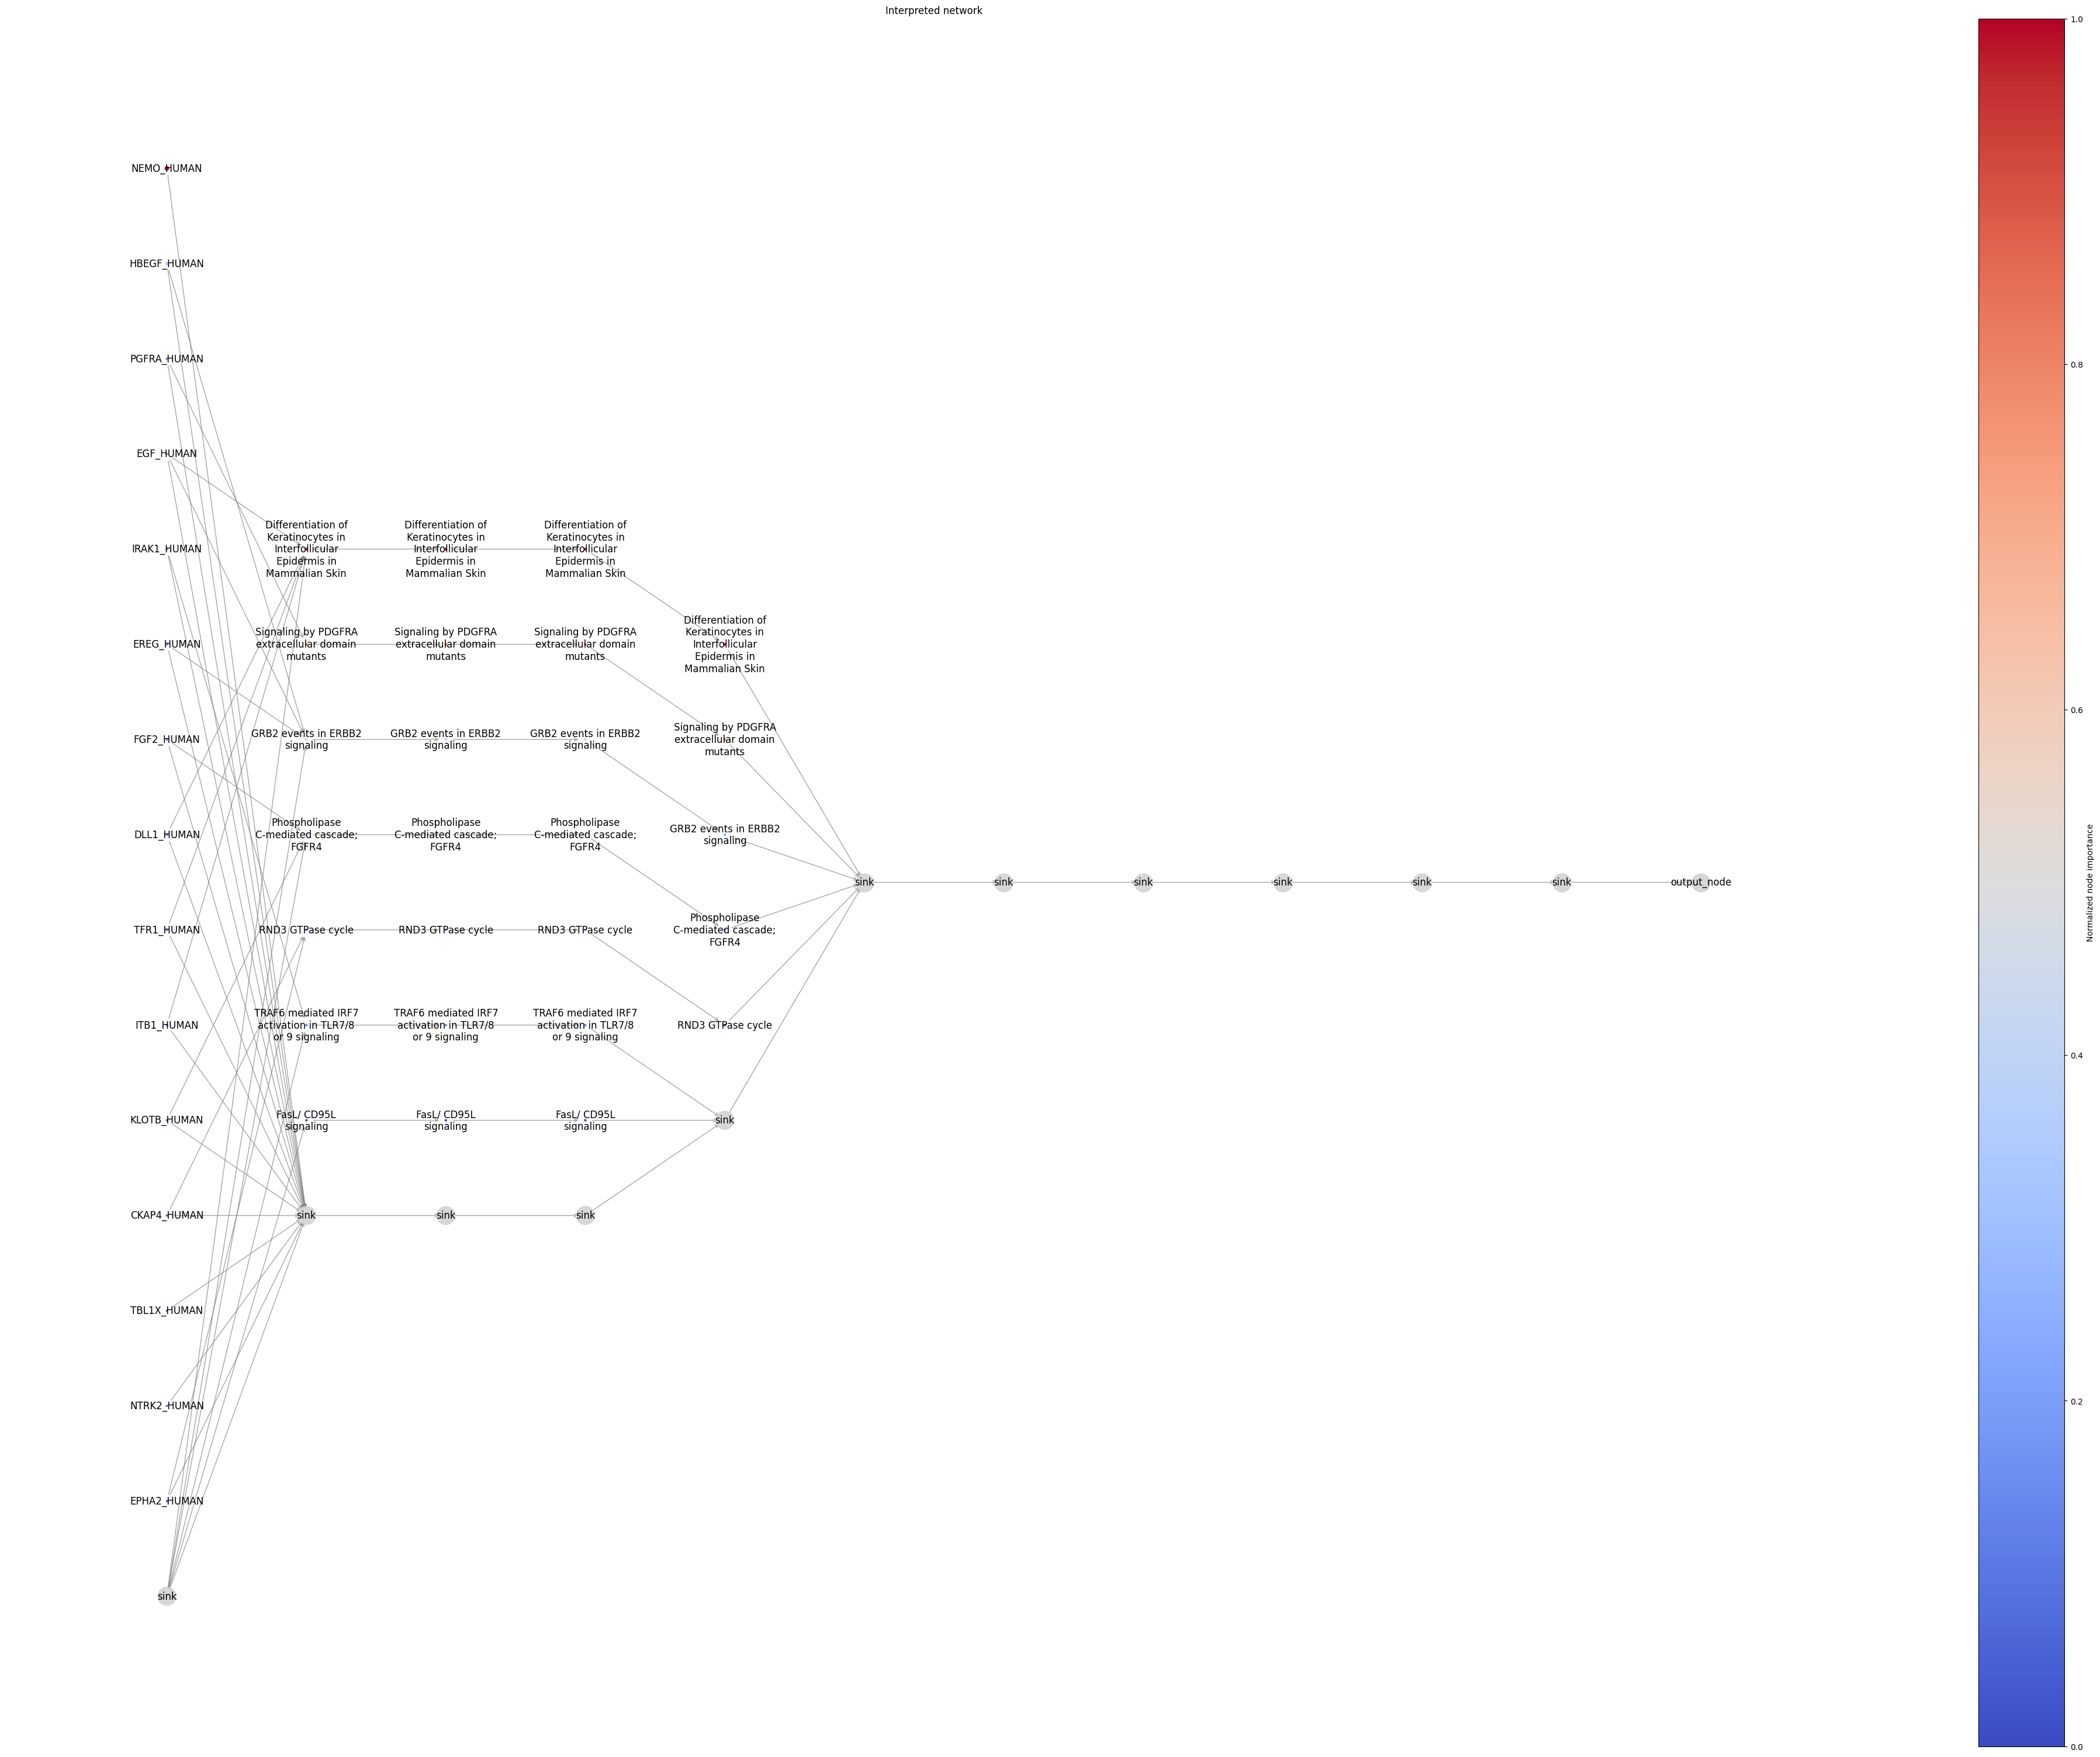

In [2]:
single_explanations = explainer.explain_single(trainval_dataloaders, normalization_method = "subgraph")

from binn.plot.network import visualize_binn

layer_specific_top_n = {"0": 15, "1": 7, "2": 7, "3": 7, "4": 5} #Default 10, 7, 5, 5
plt = visualize_binn(
    single_explanations,
    top_n=layer_specific_top_n,
    plot_size=(40, 30),
    sink_node_size=500,
    node_size_scaling=200,
    edge_width=1,
    node_cmap="coolwarm",
    pathways_mapping="reactome",
    input_entity_mapping="uniprot"
)
plt.title("Interpreted network")

In [3]:
single_explanations

,source_layer,target_layer,source_node,target_node,class_idx,importance,normalized_importance,source_tuple,target_tuple
0,0,1,A6NI73,R-HSA-198933,0,1.818301e-19,9.091507e-20,"(A6NI73, 0)","(R-HSA-198933, 1)"
1,0,1,A6NI73,R-HSA-198933,1,1.865167e-19,9.325837e-20,"(A6NI73, 0)","(R-HSA-198933, 1)"
2,0,1,A6NI73,R-HSA-198933,2,1.570298e-19,7.851489e-20,"(A6NI73, 0)","(R-HSA-198933, 1)"
3,0,1,A6NI73,R-HSA-198933,3,3.809164e-20,1.904582e-20,"(A6NI73, 0)","(R-HSA-198933, 1)"
4,0,1,A6NI73,R-HSA-198933,4,4.284408e-19,2.142204e-19,"(A6NI73, 0)","(R-HSA-198933, 1)"
...,...,...,...,...,...,...,...,...,...
567965,10,11,R-HSA-9748784,output_node,60,0.000000e+00,0.000000e+00,"(R-HSA-9748784, 10)","(output_node, 11)"
567966,10,11,R-HSA-9748784,output_node,61,0.000000e+00,0.000000e+00,"(R-HSA-9748784, 10)","(output_node, 11)"
567967,10,11,R-HSA-9748784,output_node,62,0.000000e+00,0.000000e+00,"(R-HSA-9748784, 10)","(output_node, 11)"
567968,10,11,R-HSA-9748784,output_node,63,0.000000e+00,0.000000e+00,"(R-HSA-9748784, 10)","(output_node, 11)"


In [8]:
feature_name_mapping

{'P42785': 'PRCP',
 'P00915': 'CA1',
 'P05362': 'ICAM1',
 'O00533': 'CHL1',
 'Q15582': 'TGFBI',
 'P17813': 'ENG',
 'P55058': 'PLTP',
 'P05543': 'SERPINA7',
 'P17936': 'IGFBP3',
 'P20023': 'CR2',
 'P05154': 'SERPINA5',
 'O75015': 'FCGR3B',
 'P24592': 'IGFBP6',
 'P12830': 'CDH1',
 'P13501': 'CCL5',
 'Q16627': 'CCL14',
 'P22749': 'GNLY',
 'P46531': 'NOTCH1',
 'P19021': 'PAM',
 'P04070': 'PROC',
 'P01034': 'CST3',
 'P13591': 'NCAM1',
 'Q15113': 'PCOLCE',
 'Q8NHL6': 'LILRB1',
 'P08581': 'MET',
 'Q14767': 'LTBP2',
 'P16871': 'IL7R',
 'P19320': 'VCAM1',
 'P14151': 'SELL',
 'P03951': 'F11',
 'P49747': 'COMP',
 'P22748': 'CA4',
 'Q13332': 'PTPRS',
 'P11226': 'MBL2',
 'P01033': 'TIMP1',
 'Q9Y5C1': 'ANGPTL3',
 'Q06141': 'REG3A',
 'P00441': 'SOD1',
 'P15529': 'CD46',
 'P11215': 'ITGAM',
 'P24821': 'TNC',
 'P14543': 'NID1',
 'Q9BXR6': 'CFHR5',
 'Q14515': 'SPARCL1',
 'O15031': 'PLXNB2',
 'Q9H1U4': 'MEGF9',
 'P03950': 'ANG',
 'P15907': 'ST6GAL1',
 'P27487': 'DPP4',
 'P05451': 'REG1A',
 'Q16769': 'QPC


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


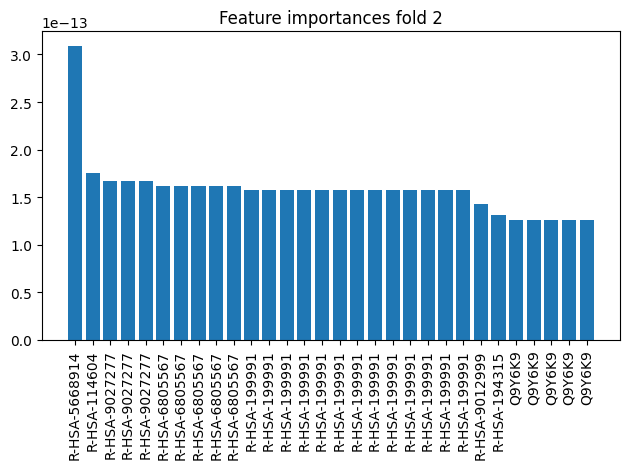

In [5]:
feature_name_mapping = dict(zip(df1['Uniprot ID'], df1['Assay']))

single_explanations_sorted = single_explanations.sort_values(by='importance', ascending=False)
top_features = single_explanations_sorted.head(100)  # Select top 100 features
    
# Recover original feature names
top_features['Feature'] = top_features['source_node'].map(feature_name_mapping).fillna(top_features['source_node'])

# Save top feature importances for this fold
fold_feature_importances = pd.DataFrame({
    'Feature': top_features['Feature'].values,
    'Importance': top_features['importance'].values,
    'Rank': range(1, len(top_features) + 1)
})
fold_feature_importances['Fold'] = fold

# Append this fold's DataFrame to the list for further analysis
top_features_df_list.append(fold_feature_importances)

# Plot most important features
plt.figure()
plt.title("Feature importances fold " + str(fold + 1))
plt.bar(range(30), top_features['importance'].values[:30])
plt.xticks(range(30), top_features['source_node'].values[:30], rotation=90)
plt.tight_layout()
plt.savefig(os.path.join(path_to_save_plots, f"Feature_importances_{name_file}_fold_{fold+1}.png"))


In [28]:
all_inputs, _ = explainer._gather_all_from_dataloader(trainval_dataloaders, split='train')
all_inputs = all_inputs.to(explainer.model.device)

shap_dict = explainer._explain_layers(all_inputs, all_inputs)

In [38]:
explanation_df = explainer._shap_to_dataframe(shap_dict)

IndexError: index 45 is out of bounds for axis 0 with size 45

In [30]:
shap_dict.keys()

dict_keys(['features', 'shap_values'])

In [36]:
shap_dict['features']

[['A6NI73',
  'O00161',
  'O00220',
  'O00233',
  'O00241',
  'O00253',
  'O00273',
  'O00300',
  'O00308',
  'O00533',
  'O00548',
  'O00585',
  'O00622',
  'O14594',
  'O14625',
  'O14763',
  'O14773',
  'O14786',
  'O14788',
  'O14793',
  'O14798',
  'O14836',
  'O14867',
  'O14944',
  'O15123',
  'O15169',
  'O15197',
  'O15232',
  'O15263',
  'O15444',
  'O15455',
  'O15467',
  'O15496',
  'O43157',
  'O43278',
  'O43291',
  'O43464',
  'O43505',
  'O43508',
  'O43524',
  'O43557',
  'O43561',
  'O43597',
  'O43707',
  'O43915',
  'O43927',
  'O60259',
  'O60462',
  'O60542',
  'O60609',
  'O60763',
  'O60880',
  'O60907',
  'O60911',
  'O75015',
  'O75023',
  'O75326',
  'O75356',
  'O75475',
  'O75509',
  'O75594',
  'O75695',
  'O75791',
  'O75888',
  'O76036',
  'O94907',
  'O95185',
  'O95379',
  'O95407',
  'O95445',
  'O95630',
  'O95633',
  'O95721',
  'O95727',
  'O95750',
  'O95786',
  'O95971',
  'O95998',
  'P00352',
  'P00441',
  'P00519',
  'P00533',
  'P00749',
  'P

In [37]:
shap_dict['shap_values']

[[array([[ 4.035e-17,  1.093e-15,  9.141e-17, ...,  3.534e-15, -1.402e-17,
          -2.358e-17],
         [-7.596e-18, -8.286e-15, -6.288e-17, ...,  1.217e-15,  1.844e-17,
          -2.219e-17],
         [ 4.441e-17, -2.154e-14, -2.573e-17, ..., -2.953e-15,  7.255e-17,
           8.132e-17],
         ...,
         [ 4.689e-18,  1.510e-14,  4.682e-17, ...,  3.351e-15,  7.545e-17,
          -1.667e-16],
         [ 1.929e-17, -2.270e-14, -6.058e-17, ..., -1.302e-14, -9.124e-18,
          -9.726e-17],
         [-7.572e-18, -4.399e-15, -3.415e-17, ...,  3.535e-15,  8.016e-17,
           1.250e-16]]),
  array([[-4.055e-17, -4.493e-16, -7.646e-17, ..., -4.231e-15, -2.014e-17,
           2.370e-17],
         [ 7.633e-18,  3.405e-15,  5.284e-17, ..., -1.441e-15,  2.650e-17,
           2.230e-17],
         [-4.462e-17,  8.852e-15,  2.154e-17, ...,  3.567e-15,  1.043e-16,
          -8.171e-17],
         ...,
         [-4.711e-18, -6.207e-15, -3.926e-17, ..., -4.006e-15,  1.084e-16,
           1.

In [ ]:
    
# Extract feature importance scores from BINN on test data
feature_importances = explainer.explain(dataloaders=trainval_dataloaders, 
                                        split='train', nr_iterations=10,
                                        num_epochs=10, trainer=trainer)

In [ ]:
indices = np.argsort(feature_importances)[::-1]

# Select top 50 features and save them for this fold
fold_feature_importances = pd.DataFrame({
    'Feature': test.columns[indices][:100],
    'Importance': feature_importances[indices][:100],
    'Rank': range(1, 101)
})
fold_feature_importances['Fold'] = fold

# Append this fold's DataFrame to the list for further analysis
top_features_df_list.append(fold_feature_importances)

# Plot most important features
plt.figure()
plt.title("Feature importances fold "+str(fold+1))
plt.bar(range(30), feature_importances[indices][:30])
plt.xticks(range(30), test.columns[indices][:30], rotation=90)
plt.tight_layout()
plt.savefig(os.path.join(path_to_save_plots, f"Feature_importances_{name_file}_fold_{fold+1}.png"))

# Visualize interpreted network
layer_specific_top_n = {"0": 10, "1": 7, "2": 5, "3": 5, "4": 5}
plt_network = visualize_binn(single_explanations, top_n=layer_specific_top_n, plot_size=(20, 10), 
                                sink_node_size=500, node_size_scaling=200, edge_width=1, node_cmap="coolwarm")
plt_network.title("Interpreted network fold " + str(fold + 1))
plt_network.savefig(os.path.join(path_to_save_plots, f"Interpreted_network_{name_file}_fold_{fold+1}.png"))

In [ ]:
layer_specific_top_n = {"0": 15, "1": 7, "2": 7, "3": 7, "4": 5} #Default 10, 7, 5, 5
plt = visualize_binn(
    single_explanations,
    top_n=layer_specific_top_n,
    plot_size=(40, 30),
    sink_node_size=500,
    node_size_scaling=200,
    edge_width=1,
    node_cmap="coolwarm",
    pathways_mapping="reactome",
    input_entity_mapping="uniprot"
)
plt.title("Interpreted network")

In [6]:
binn.eval()
with torch.no_grad():
    sample_inputs, _ = next(iter(test_dataloaders['train']))
    sample_outputs = binn(sample_inputs.to(binn.device))
    print("Model output shape:", sample_outputs.shape)

Model output shape: torch.Size([34, 2])


In [11]:
pd.DataFrame(X_false_positives, columns=test_false_positives.drop(columns=['ID_proteinData', 'Group']).columns, index=test_false_positives['ID_proteinData'])

,P42785,P00915,P05362,O00533,Q15582,P17813,P55058,P05543,P17936,P20023,...,P28827,Q86SF2,P17948,Q99536,P13693,P32004,Q99795,P13747,Q08174,P01303
ID_proteinData,,,,,,,,,,,,,,,,,,,,,
547,-0.826940,0.077375,0.101782,0.729170,-1.008899,-0.122638,0.169292,-0.863386,-0.614001,0.662110,...,1.075108,0.646474,2.066044,1.600475,-0.227871,-0.105335,0.104037,1.617896,1.227101,0.521310
906,-0.487477,0.805599,-1.354069,-0.638493,-1.316191,-0.316286,0.101486,-1.057698,-0.423818,-0.870113,...,-0.028854,-0.572433,0.129675,1.030613,-0.403792,-0.024682,-0.231659,-0.121372,0.942401,0.468276
1704,-0.429927,-0.590714,-0.579634,-0.588110,-1.002640,-0.631039,-1.315377,-1.999695,-0.621427,-0.714869,...,-1.858500,-0.635001,-3.147732,-2.292973,-0.597497,-1.192319,-0.073844,-0.768723,-1.533755,-0.317251
2309,1.327667,-1.095805,1.244563,1.271457,-0.859799,1.062237,-0.455331,0.115957,-1.029944,-0.027319,...,1.651432,0.134580,0.584171,0.256861,-0.166995,-0.361337,-1.487997,-0.441518,-0.021548,0.514434
2996 (2015),-0.707304,-0.077029,-0.230332,0.773534,-0.661660,0.265207,1.679416,-0.386425,0.824084,0.870785,...,-0.900634,-0.186166,-1.106447,0.897302,-0.279426,0.208459,0.779090,-1.099859,-1.317314,0.307542


In [10]:
X_false_positives.shape

(5, 930)

In [12]:
X_false_positives

,P42785,P00915,P05362,O00533,Q15582,P17813,P55058,P05543,P17936,P20023,...,P28827,Q86SF2,P17948,Q99536,P13693,P32004,Q99795,P13747,Q08174,P01303
139,0.37262,6.83290,6.42498,3.68902,8.05864,2.00172,2.23641,4.43102,3.32623,6.52729,...,5.40956,5.71862,5.29061,6.22301,1.87492,6.72552,7.85709,4.13917,7.59322,8.39080
140,0.73851,7.51663,5.74228,3.32093,7.89910,1.86088,2.22088,4.35313,3.43047,5.64691,...,5.08486,5.32256,4.88088,6.09883,1.71942,6.74637,7.41043,3.36055,7.53195,8.35964
141,0.80054,6.20563,6.10544,3.33449,8.06189,1.63196,1.89637,3.97553,3.32216,5.73611,...,4.54672,5.30223,4.18739,5.37458,1.54820,6.44452,7.62041,3.07075,6.99906,7.89810
142,2.69496,5.73140,6.96087,3.83497,8.13605,2.86348,2.09335,4.82359,3.09825,6.13116,...,5.57907,5.55229,4.97705,5.93022,1.92873,6.65934,5.73881,3.21723,7.32450,8.38676
143,0.50157,6.68793,6.26924,3.70096,8.23892,2.28380,2.58228,4.62221,4.11445,6.64719,...,4.82845,5.44807,4.61932,6.06978,1.82935,6.80664,8.75528,2.92251,7.04564,8.26520


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from sklearn.model_selection import StratifiedKFold, train_test_split
# add path to binn in sys /home/ubuntu/tenerife/data/ZZ_githubRepos/BINN
sys.path.append('/home/ubuntu/tenerife/data/ZZ_githubRepos/BINN')
from binn import BINN, BINNDataLoader, BINNTrainer, BINNExplainer
from binn.plot.network import visualize_binn
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import torch

np.set_printoptions(precision=3)
path_to_save_results = '/home/ubuntu/tenerife/data/LungAmbition/Proteinas/ResultsBaselines_BMY0/BINN'
path_to_save_plots = os.path.join(path_to_save_results, 'Plots')
n_folds=3
path_to_folds_csv = f'/home/ubuntu/tenerife/data/ZZ_githubRepos/LungAmbition/Data_stratified_split/folds-def_{n_folds}folds'
keep_false_positives_as_separate_test = True
# create path_to_save_plots if it does not exist
if not os.path.exists(path_to_save_plots):
    os.makedirs(path_to_save_plots)
name_file= f"BINN_proteins_11march25_{n_folds}folds"
if keep_false_positives_as_separate_test:
    name_file= name_file + "_keep_FP_separated_test"
sys.stdout=open(os.path.join(path_to_save_results, "run_out_"+name_file+".txt"),'w')
# save prints in a txt file
original_stdout = sys.stdout

df_merged = pd.read_csv('/home/ubuntu/tenerife/data/LungAmbition/Excels_merged/LungAmbitionMergedAllGroupUpdated3mar2025.csv')
# filter df_merged by GroupUpdated to keep only Lung_Cancer, Benign_Nodules and False_Positive
df_merged = df_merged[df_merged['GroupUpdated'].isin(['Lung_Cancer', 'Benign_Nodules', 'False_Positive'])]
columns_to_drop = ['ID_imagingData','Cancer_Status','TimeYears_blood','TimeMonths_blood',
                            'TimeYears_CT_blood','TimeMonths_CT_blood','Diff_Diag_Blood_TimeYears','LastFollow_upTimeYears',
                            'Age','Sex','Body_mass_index','Smoking_status','Years_smoked','Smoking_pack_years',
                            'Family_history_lung_cancer','Personal_history_cancer','Stage_category','NRRD_File','SEG_Files', 'GroupUpdated']

df_merged = df_merged.drop(columns=columns_to_drop)
df1=pd.read_csv('/home/ubuntu/tenerife/data/LungAmbition/Proteinas/OlinkCode_UniprotID.csv')
for column in df_merged.columns:
    if column == 'ID_proteinData' or column == 'Group':
        continue
    if column in df1['Assay'].values:
        df_merged = df_merged.rename(columns
                            =dict(zip(df1['Assay'], df1['Uniprot ID'])))
    else:
        # print(column)
        # drop column from df_merged
        df_merged = df_merged.drop(columns=column)
feature_name_inverse_mapping = dict(zip(df1['Uniprot ID'], df1['Assay']))
if keep_false_positives_as_separate_test:
    y_false_positives = df_merged[df_merged['Group'] == 'False_Positive']['Group']
    # convert label to 1
    y_false_positives = y_false_positives.replace({'False_Positive': 0})
    ID_false_positives = df_merged[df_merged['Group'] == 'False_Positive']['ID_proteinData']
    # create list to store wrong predicted false positives
    list_ID_wrong_predicted_false_positives = []
    test_false_positives=df_merged[df_merged['Group'] == 'False_Positive']
    X_false_positives = df_merged[df_merged['Group'] == 'False_Positive'].drop(columns=['ID_proteinData', 'Group'])
    # drop in df_cur rows where Group is False_Positive
    df_merged = df_merged[df_merged['Group'].isin(['Lung_Cancer', 'Benign_Nodules'])]
    print("Number of false positives:", X_false_positives.shape[0])
    # save false_positive_metrics in df
    false_positive_metrics = pd.DataFrame(columns=['AUC', 'Balanced_accuracy', 'Accuracy', 'Precision', 'Recall', 'F1-score'])